In [1]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
mkdir output

In [4]:
mkdir sampleTest_Pictures

In [3]:
mkdir utils

In [9]:
modelName = '/content/gdrive/MyDrive/Colab Notebooks/chest-xray-pneumonia/Output_Backups/weights-014-0.1170.keras'

In [8]:
cp '/content/gdrive/MyDrive/Colab Notebooks/chest-xray-pneumonia/Output_Backups/weights-014-0.1170.keras' '/content/output'

In [10]:
cp 'gdrive/MyDrive/Colab Notebooks/chest-xray-pneumonia/sampleTest_Pictures/Normal.jpeg' '/content/sampleTest_Pictures'

In [11]:
cp 'gdrive/MyDrive/Colab Notebooks/chest-xray-pneumonia/sampleTest_Pictures/Pneumonia.jpeg' '/content/sampleTest_Pictures'

In [12]:
cp 'gdrive/MyDrive/Colab Notebooks/chest-xray-pneumonia/utils/config.py' '/content/utils'

In [13]:
# Importing the libraries
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow
from utils import config
import numpy as np
import argparse
import cv2
import os

In [14]:
# Model Path
modelName = "weights-014-0.1170.keras"
modelPath = config.outputPath + '/' + modelName

# Load the model
bestModel = load_model(modelPath)
print("Model loaded successfully from:", modelPath)


Model loaded successfully from: /content/output/weights-014-0.1170.keras


In [15]:
# Setting the Paths
imagePath =  config.PROJ_PATH + "/sampleTest_Pictures/Pneumonia.jpeg"

In [16]:
# Loading the Pneumonia detector model
print("Loading Pneumonia detector model...")
model = load_model(modelPath)

Loading Pneumonia detector model...


In [17]:
# Loading the input image
image = cv2.imread(imagePath)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
RESULT :normal: 58.71%


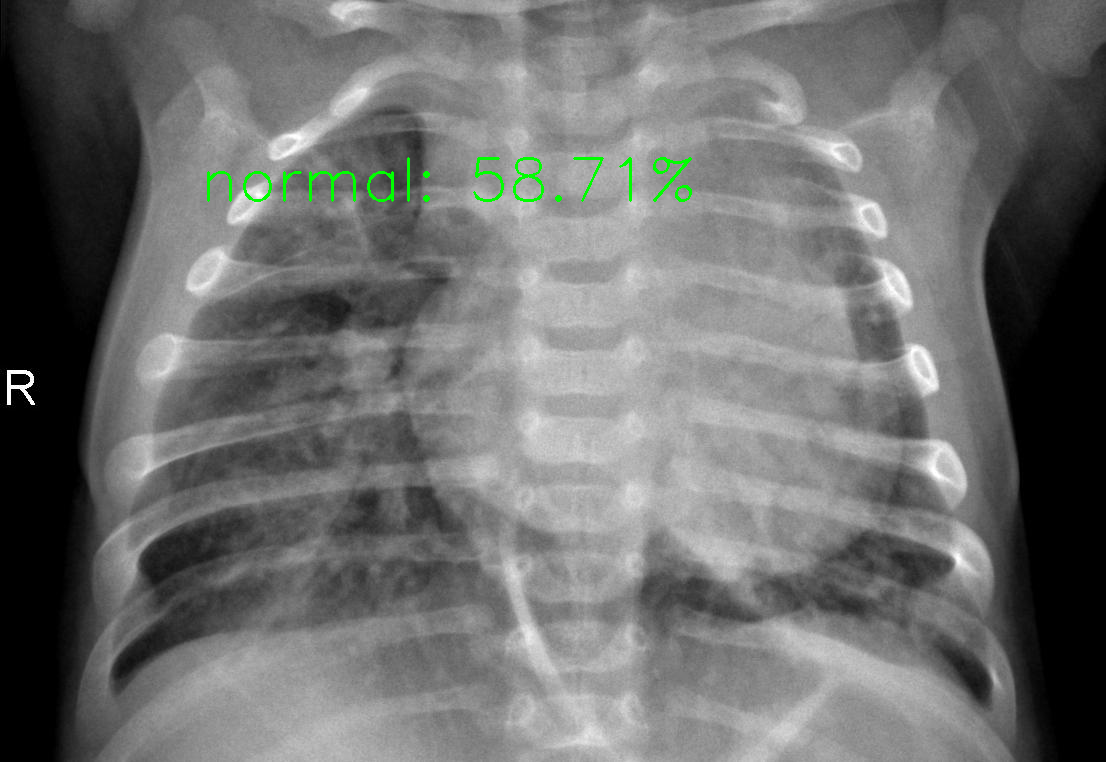

In [18]:
# Convert it from BGR to RGB channel ordering, resize it to 224x224, and preprocess it
image1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image1 = cv2.resize(image1, (224, 224))
image1 = img_to_array(image1)
image1 = preprocess_input(image1)
image1 = np.expand_dims(image1, axis=0)

# Pass the image through the model to determine if the person has pneumonia
(normal, pneumonia) = model.predict(image1)[0]
label = "normal" if normal > pneumonia else "pneumonia"
color = (0, 255, 0) if label == "normal" else (0, 0, 255)

# Adding the probability in the label
label = "{}: {:.2f}%".format(label, max(normal, pneumonia) * 100)

# Displaying the label on the output image
cv2.putText(image, label, (200, 200),
            cv2.FONT_HERSHEY_SIMPLEX, 2, color, 2)

# Showing the output image
print("RESULT :" +label)
cv2_imshow(image)
# cv2.waitKey(0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
RESULT: pneumonia: 100.00%


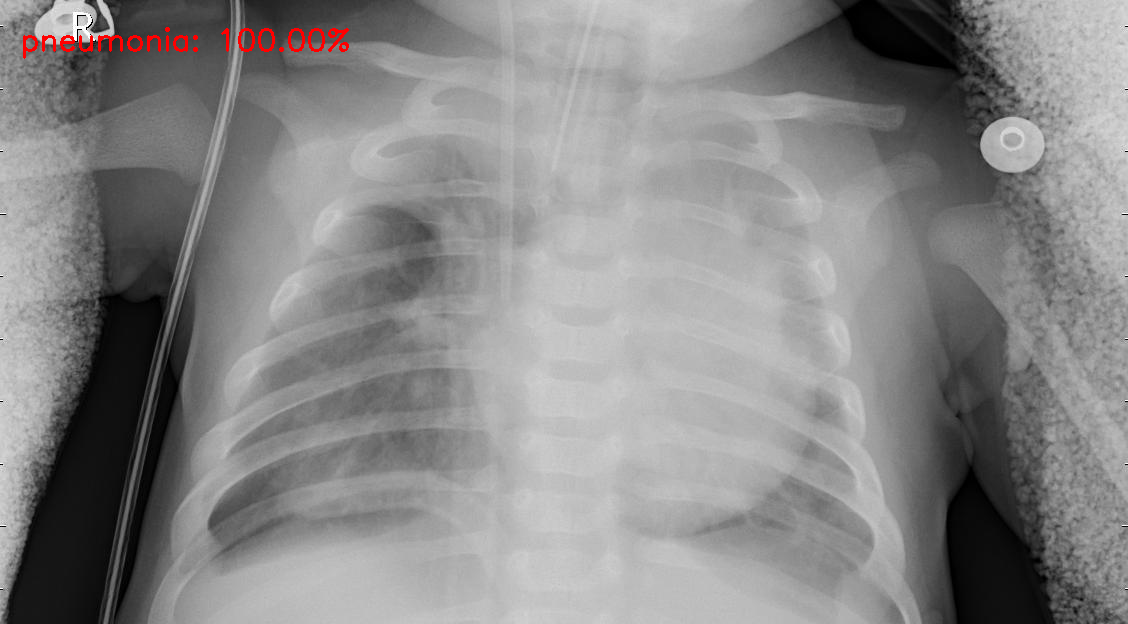

In [20]:
#code for testing other images
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import cv2
import numpy as np

# Function to test a new image
def test_image(image_path, model):
    # Load the image
    image = cv2.imread(image_path)
    image1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image1 = cv2.resize(image1, (224, 224))
    image1 = img_to_array(image1)
    image1 = preprocess_input(image1)
    image1 = np.expand_dims(image1, axis=0)

    # Pass the image through the model to determine if the person has pneumonia
    (normal, pneumonia) = model.predict(image1)[0]

    # Determine the class label and color
    label = "normal" if normal > pneumonia else "pneumonia"
    color = (0, 255, 0) if label == "normal" else (0, 0, 255)

    # Adding the probability in the label
    label = "{}: {:.2f}%".format(label, max(normal, pneumonia) * 100)

    # Displaying the label on the output image
    cv2.putText(image, label, (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
    print("RESULT: " + label)

    # Show the output image
    cv2_imshow(image)

# Example usage:
image_path = "/content/gdrive/MyDrive/Colab Notebooks/chest-xray-pneumonia/dataset/chest_xray/test/PNEUMONIA/person100_bacteria_478.jpeg"  # Replace this with the path to your new image
test_image(image_path, model)
